# <center>Analyse et visualisation des données</center>

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import hist

## Importation du jeu de données

In [3]:
df = pd.read_csv('./export.csv')

### Visualisation des premières lignes du jeu de données

In [4]:
df.head()

,Unnamed: 0,lat,lng,zip,title,timeStamp,twp,addr
0,0,40.297876,-75.581294,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,1,40.258061,-75.264680,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,2,40.121182,-75.351975,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,3,40.116153,-75.343513,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,4,40.251492,-75.603350,19464,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


### Informations complémentaires de nos données

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663229 entries, 0 to 663228
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  663229 non-null  int64  
 1   lat         663229 non-null  float64
 2   lng         663229 non-null  float64
 3   zip         663229 non-null  int64  
 4   title       663229 non-null  object 
 5   timeStamp   663229 non-null  object 
 6   twp         663229 non-null  object 
 7   addr        663229 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 40.5+ MB


## Analyse des différentes colonnes

### Statistiques du Dataframe

In [8]:
df.describe()

,Unnamed: 0,lat,lng,zip
count,663229.000000,663229.000000,663229.000000,663229.000000
mean,331742.029754,40.158142,-75.300036,19242.897713
std,191540.445353,0.220639,1.673049,291.513639
min,0.000000,0.000000,-119.698206,1104.000000
25%,165863.000000,40.100344,-75.392751,19038.000000
50%,331731.000000,40.143821,-75.305143,19403.000000
75%,497613.000000,40.229008,-75.211812,19446.000000
max,663521.000000,51.335390,87.854975,77316.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'lng'}>,
        <AxesSubplot:title={'center':'zip'}>]], dtype=object)

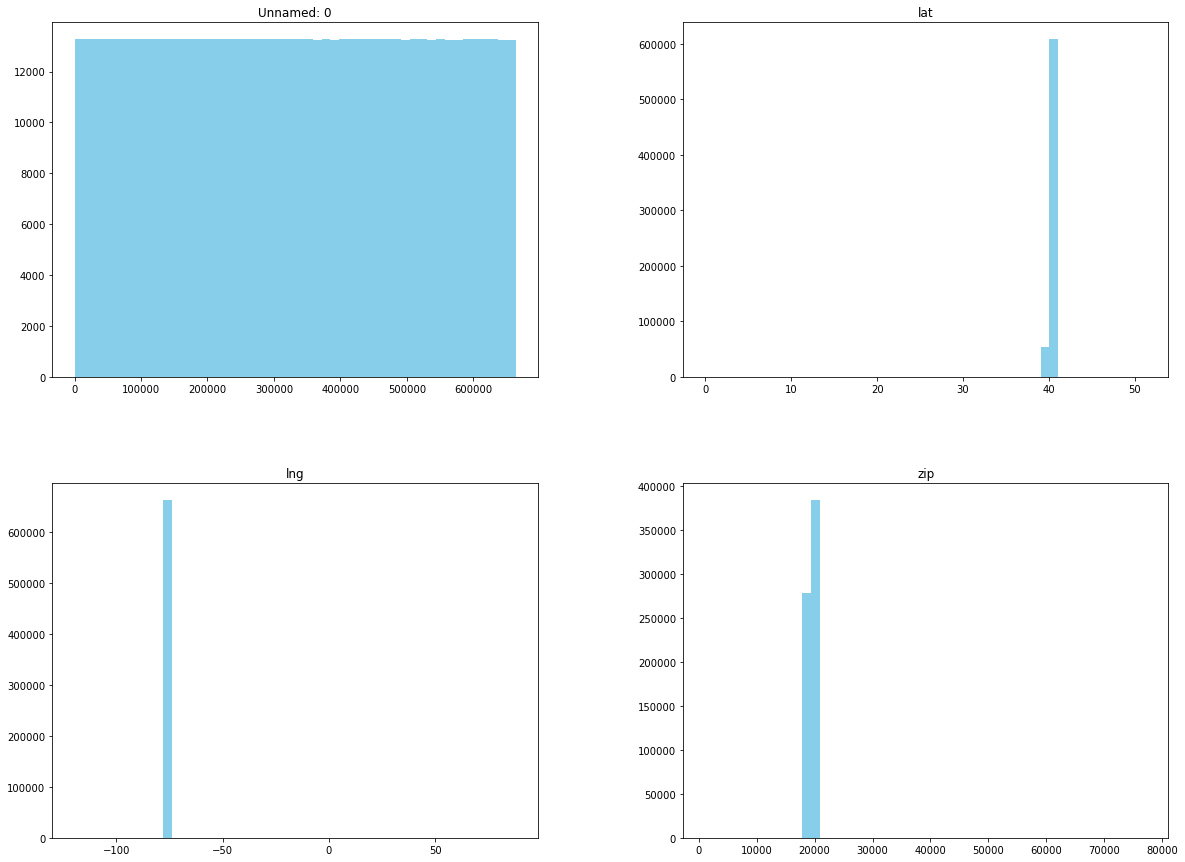

In [9]:
df.hist(bins=50, figsize=(20,15), color='skyblue', grid=False)